In [11]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Machine Learning Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.model_selection import GridSearchCV, KFold

# Tensorflow
import tensorflow as tf
import keras
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential, Model

In [12]:
# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

**Load Dataset**

In [3]:
train_data = pd.read_csv('/content/train_emails.csv')
test_data = pd.read_csv('/content/test_emails.csv')

**Examine Data**

In [4]:
train_data.head()

,...,u,call,s,2,get,go,m,ur,n't,...,norm150p/ton,instead,sim,tyler,cri,hunni,cross,slave,whether,label
0,2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
train_data.describe()

,...,u,call,s,2,get,go,m,ur,n't,...,norm150p/ton,instead,sim,tyler,cri,hunni,cross,slave,whether,label
count,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,...,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000
mean,0.226732,0.192420,0.114375,0.089258,0.084100,0.083203,0.078941,0.071765,0.066383,0.065934,...,0.001121,0.001121,0.001121,0.001121,0.001121,0.001121,0.001121,0.001121,0.001121,0.131420
std,0.686630,0.566546,0.356843,0.322784,0.342012,0.293542,0.295097,0.282206,0.338349,0.308623,...,0.033471,0.033471,0.033471,0.033471,0.039610,0.033471,0.033471,0.033471,0.033471,0.337897
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,6.000000,3.000000,4.000000,4.000000,2.000000,4.000000,3.000000,6.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
train_data.isnull().sum()

,0
...,0
u,0
call,0
s,0
2,0
...,...
hunni,0
cross,0
slave,0
whether,0


In [8]:
train_data.shape

(4459, 1365)

**Seperate X & y Values**

In [9]:
X = train_data.drop('label', axis=1).values # featuers
y = train_data['label'].values # true target value

X_test = test_data.drop('label', axis=1).values # featuers
y_test = test_data['label'].values # true target value

#**Multi-layer Perceptron (MLP)**

In [14]:
# Hyperparameters
width = [64, 128]
depth = [2, 3]

# Set up 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Track best configuration
best_val_loss = float('inf')
best_config = None
best_model_weights = None

# Loop over all combinations of width and depth
for w in width:
  for d in depth:

    train_loss = []
    val_loss = []

    print('\n' + 'Hyperparameters: ' + 'Width = ' + str(w) + ', Depth = ' + str(d))

    # Loop over each of the 5 folds
    for train_index, val_index in kf.split(X):

      # Split data into training and validation sets for current fold
      X_train, X_val = X[train_index], X[val_index]
      y_train, y_val = y[train_index], y[val_index]

      # Initialize a new Sequential model for this fold
      model = Sequential()

      # Input Layer
      model.add(Input(shape=(X_train.shape[1],)))

      # Hidden Layers (creates d hidden layers, each with w neurons)
      for i in range(d):
        model.add(Dense(w, activation='relu'))

      # Output Layer
      model.add(Dense(1, activation='sigmoid'))

      # Compile the model
      model.compile(optimizer = tf.keras.optimizers.Adam(),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

      # Train the model
      history = model.fit(
          X_train,
          y_train,
          validation_data=(X_val, y_val),
          verbose=0,
          epochs = 50,
          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
      )

      # Save the Final Train and Val Loss for Fold
      min_train = min(history.history['loss'])
      min_val = min(history.history['val_loss'])

      train_loss.append(min_train)
      val_loss.append(min_val)

    # Compute Mean Loss Across 5 Folds
    mean_train_loss = np.mean(train_loss)
    mean_val_loss = np.mean(val_loss)

    # Print Summary for this hyperparameter combination
    print('Mean Train Loss: ' + str(round(mean_train_loss, 4)) +
          ' -- Mean Validation Loss: ' + str(round(mean_val_loss, 4)))

    # Save Best Model Config
    if mean_val_loss < best_val_loss:
      best_val_loss = mean_val_loss
      best_config = (w, d)
      best_model_weights = model.get_weights()

# Display Best Hyperparameter
print('\n' + 'Best Hyperparameters: ' + 'Width = ' + str(best_config[0]) + ', Depth = ' + str(best_config[1]))


Hyperparameters: Width = 64, Depth = 2
Mean Train Loss: 0.0037 -- Mean Validation Loss: 0.0745

Hyperparameters: Width = 64, Depth = 3
Mean Train Loss: 0.0031 -- Mean Validation Loss: 0.0785

Hyperparameters: Width = 128, Depth = 2
Mean Train Loss: 0.0033 -- Mean Validation Loss: 0.0714

Hyperparameters: Width = 128, Depth = 3
Mean Train Loss: 0.0029 -- Mean Validation Loss: 0.073

Best Hyperparameters: Width = 128, Depth = 2


In [15]:
# Train Best Hyperparameters on Entire Training Data
model = Sequential()
model.add(Input(shape=(X.shape[1],)))
for _ in range(best_config[1]):
    model.add(Dense(best_config[0], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X, y,
    validation_split=0.1,
    verbose=0,
    epochs = 50,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)

print('Final Train Loss:', min(history.history['loss']))
print('Final Validation Loss:', min(history.history['val_loss']))

Final Train Loss: 0.003678641514852643
Final Validation Loss: 0.04459603130817413


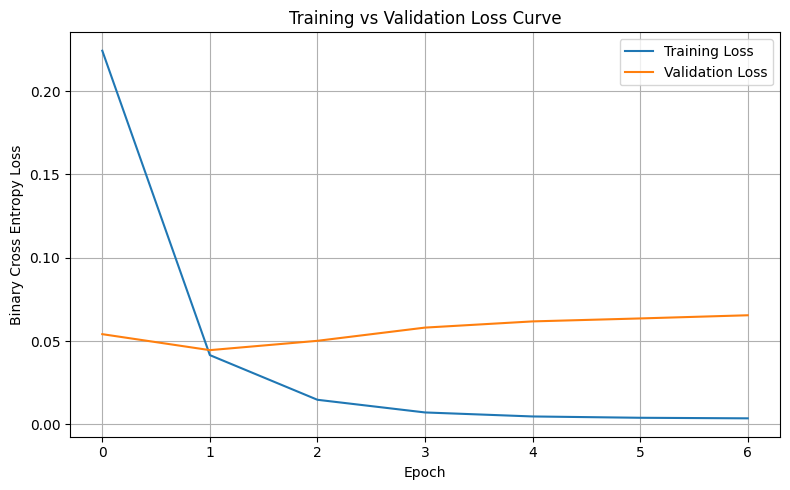

In [16]:
# Plot Train & Val Loss Curve
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Binary Cross Entropy Loss')
plt.title('Training vs Validation Loss Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
# Evaluate Model on Test Data
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Test Loss:", log_loss(y_test, y_pred_prob))

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.9865470852017937
Precision: 0.9932432432432432
Recall: 0.9130434782608695
F1 Score: 0.9514563106796117
Test Loss: 0.05316725251649608


#**Support Vector Machine (SVM)**

In [19]:
# Custom log loss scoring function for GridSearchCV
def custom_log_loss(estimator, X, y):
    y_prob = estimator.predict_proba(X)[:, 1]
    return -log_loss(y, y_prob)  # negative for compatibility with GridSearchCV

# Define parameter grid
param_grid = {'C': [0.1, 1]}

# Set up GridSearchCV with custom log loss scorer
grid = GridSearchCV(
    SVC(probability=True),
    param_grid=param_grid,
    scoring=custom_log_loss,
    cv=5,
    return_train_score=True,
    refit=True
)

# Train grid search on training data
grid.fit(X, y)

# Display average train and validation loss for each C
print("\nTrain and Validation Loss for Each C:")
for i, params in enumerate(grid.cv_results_['params']):
    train_loss = -grid.cv_results_['mean_train_score'][i]
    val_loss = -grid.cv_results_['mean_test_score'][i]
    print(f"C = {params['C']}: Train Loss = {train_loss:.4f}, Validation Loss = {val_loss:.4f}")

# Get best trained SVM model
best_svm = grid.best_estimator_
print("\nBest C:", grid.best_params_['C'])


Train and Validation Loss for Each C:
C = 0.1: Train Loss = 0.0427, Validation Loss = 0.0947
C = 1: Train Loss = 0.0178, Validation Loss = 0.0752

Best C: 1


In [20]:
# Hyperparameters
C_values = [0.1, 1]

# Set up 5-fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Track best model
best_val_loss = float('inf')
best_C = None
best_model = None

# Loop over each value of C
for C in C_values:
    train_losses = []
    val_losses = []

    print(f"\nHyperparameter: C = {C}")

    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        model = SVC(C=C, probability=True)
        model.fit(X_train, y_train)

        # Get predicted probabilities for loss calculation
        y_train_prob = model.predict_proba(X_train)[:, 1]
        y_val_prob = model.predict_proba(X_val)[:, 1]

        train_loss = log_loss(y_train, y_train_prob)
        val_loss = log_loss(y_val, y_val_prob)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    mean_train_loss = np.mean(train_losses)
    mean_val_loss = np.mean(val_losses)

    print(f"Mean Train Loss: {mean_train_loss:.4f}")
    print(f"Mean Validation Loss: {mean_val_loss:.4f}")

    if mean_val_loss < best_val_loss:
        best_val_loss = mean_val_loss
        best_C = C


Hyperparameter: C = 0.1
Mean Train Loss: 0.0435
Mean Validation Loss: 0.0900

Hyperparameter: C = 1
Mean Train Loss: 0.0183
Mean Validation Loss: 0.0711


In [21]:
# Train Best Hyperparameters on Entire Training Data
from sklearn.model_selection import train_test_split

# Split training data into train/validation sets
X_final_train, X_final_val, y_final_train, y_final_val = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

# Train best SVM on full training data
final_svm = SVC(C=best_C, probability=True)
final_svm.fit(X_final_train, y_final_train)

# Predict probabilities for loss calculation
y_train_prob = final_svm.predict_proba(X_final_train)[:, 1]
y_val_prob = final_svm.predict_proba(X_final_val)[:, 1]

# Compute loss
train_loss = log_loss(y_final_train, y_train_prob)
val_loss = log_loss(y_final_val, y_val_prob)

print(f"Final Train Loss: {train_loss:.4f}")
print(f"Final Validation Loss: {val_loss:.4f}")

Final Train Loss: 0.0172
Final Validation Loss: 0.0725


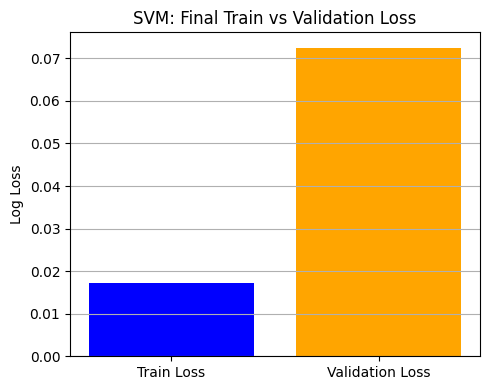

In [24]:
# Plot Train & Val Loss
plt.figure(figsize=(5, 4))
plt.bar(['Train Loss', 'Validation Loss'], [train_loss, val_loss], color=['blue', 'orange'])
plt.ylabel('Log Loss')
plt.title('SVM: Final Train vs Validation Loss')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [25]:
# Evaluate Model on Test Data
y_test_prob = final_svm.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_prob > 0.5).astype(int)

# Evaluation metrics
print("Final SVM Test Set Results:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))
print("Test Loss (Log Loss):", log_loss(y_test, y_test_prob))

Final SVM Test Set Results:
Accuracy: 0.9865470852017937
Precision: 0.9932432432432432
Recall: 0.9130434782608695
F1 Score: 0.9514563106796117
Test Loss (Log Loss): 0.05988882257335772


#**Random Forest**

In [31]:
# Set up GridSearchCV with custom log loss scorer
grid = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid={'n_estimators': [50, 100], 'max_depth': [5, 10]},
    scoring=custom_log_loss,
    cv=5,
    return_train_score=True,
    refit=True
)

# Fit the grid search
grid.fit(X, y)

# Print loss for each hyperparameter combo
print("\nTrain & Validation Loss for Each (n_estimators, max_depth):")
for i, params in enumerate(grid.cv_results_['params']):
    train_loss = -grid.cv_results_['mean_train_score'][i]
    val_loss = -grid.cv_results_['mean_test_score'][i]
    print(f"{params}: Train Loss = {train_loss:.4f}, Validation Loss = {val_loss:.4f}")

# Best model and params
best_rf = grid.best_estimator_
print("\nBest Parameters:", grid.best_params_)


Train & Validation Loss for Each (n_estimators, max_depth):
{'max_depth': 5, 'n_estimators': 50}: Train Loss = 0.5106, Validation Loss = 0.5154
{'max_depth': 5, 'n_estimators': 100}: Train Loss = 0.5179, Validation Loss = 0.5222
{'max_depth': 10, 'n_estimators': 50}: Train Loss = 0.3868, Validation Loss = 0.3983
{'max_depth': 10, 'n_estimators': 100}: Train Loss = 0.3935, Validation Loss = 0.4047

Best Parameters: {'max_depth': 10, 'n_estimators': 50}


In [32]:
# Train Best Hyperparameters on Entire Training Data

# Split training data into train/validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

# Retrain best model on this split
best_rf.fit(X_train, y_train)

# Predict probabilities
y_train_prob = best_rf.predict_proba(X_train)[:, 1]
y_val_prob = best_rf.predict_proba(X_val)[:, 1]

# Compute loss
train_loss = log_loss(y_train, y_train_prob)
val_loss = log_loss(y_val, y_val_prob)

# Print losses
print(f"Final Train Loss: {train_loss:.4f}")
print(f"Final Validation Loss: {val_loss:.4f}")

Final Train Loss: 0.3924
Final Validation Loss: 0.4072


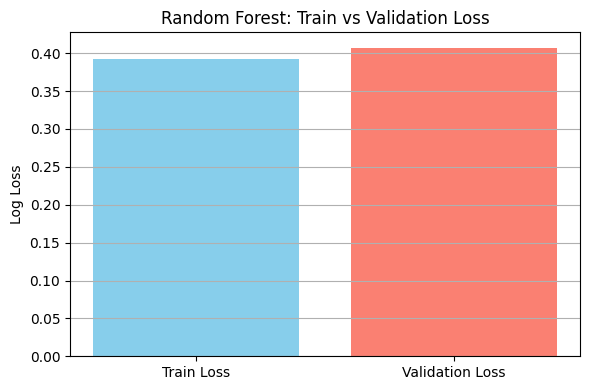

In [33]:
# Plot Train & Val Loss Curve
plt.figure(figsize=(6, 4))
plt.bar(['Train Loss', 'Validation Loss'], [train_loss, val_loss], color=['skyblue', 'salmon'])
plt.ylabel('Log Loss')
plt.title('Random Forest: Train vs Validation Loss')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [34]:
# Evaluate Model on Test Data
y_test_prob = best_rf.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_prob > 0.5).astype(int)

# Evaluate metrics
print("Final Random Forest Test Set Results:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))
print("Test Loss (Log Loss):", log_loss(y_test, y_test_prob))

Final Random Forest Test Set Results:
Accuracy: 0.9713004484304932
Precision: 0.9640287769784173
Recall: 0.8322981366459627
F1 Score: 0.8933333333333333
Test Loss (Log Loss): 0.4044794980371868


#**Decision Tree**

In [42]:
# Set up GridSearchCV with custom log loss scorer
grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid={'max_depth': [4, 8]},
    scoring=custom_log_loss,
    cv=5,
    return_train_score=True,
    refit=True
)

# Fit the grid search
grid.fit(X, y)

# Report train & val loss for each depth
print("\nTrain & Validation Loss for Each max_depth:")
for i, params in enumerate(grid.cv_results_['params']):
    train_loss = -grid.cv_results_['mean_train_score'][i]
    val_loss = -grid.cv_results_['mean_test_score'][i]
    print(f"{params}: Train Loss = {train_loss:.4f}, Validation Loss = {val_loss:.4f}")

# Best model
best_dt = grid.best_estimator_
print("\nBest max_depth:", grid.best_params_['max_depth'])


Train & Validation Loss for Each max_depth:
{'max_depth': 4}: Train Loss = 0.2104, Validation Loss = 0.2426
{'max_depth': 8}: Train Loss = 0.1454, Validation Loss = 0.3697

Best max_depth: 4


In [43]:
# Train Best Hyperparameters on Entire Training Data

# Split training data into train/val sets
X_train_full, X_val_full, y_train_full, y_val_full = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y)

# Retrain best Decision Tree on full training split
best_dt.fit(X_train_full, y_train_full)

# Predict probabilities for log loss
y_train_prob = best_dt.predict_proba(X_train_full)[:, 1]
y_val_prob = best_dt.predict_proba(X_val_full)[:, 1]

# Compute and display losses
train_loss = log_loss(y_train_full, y_train_prob)
val_loss = log_loss(y_val_full, y_val_prob)

print("Final Train Loss:", round(train_loss, 4))
print("Final Validation Loss:", round(val_loss, 4))

Final Train Loss: 0.2053
Final Validation Loss: 0.267


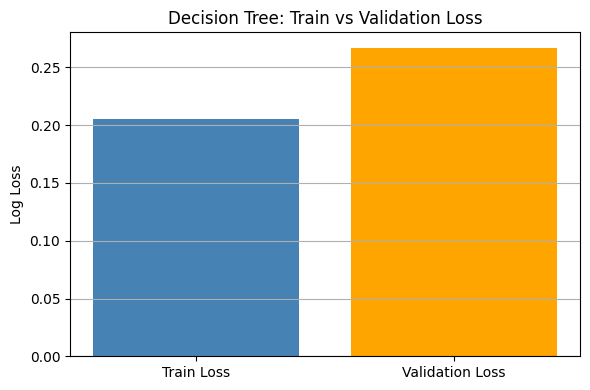

In [44]:
# Plot Train & Val Loss Curve
plt.figure(figsize=(6, 4))
plt.bar(['Train Loss', 'Validation Loss'], [train_loss, val_loss], color=['steelblue', 'orange'])
plt.ylabel('Log Loss')
plt.title('Decision Tree: Train vs Validation Loss')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [45]:
# Evaluate Model on Test Data
y_test_prob = best_dt.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_prob > 0.5).astype(int)

# Compute evaluation metrics
print("Final Decision Tree Test Set Results:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))
print("Test Loss (Log Loss):", log_loss(y_test, y_test_prob))

Final Decision Tree Test Set Results:
Accuracy: 0.9085201793721973
Precision: 0.697986577181208
Recall: 0.6459627329192547
F1 Score: 0.6709677419354839
Test Loss (Log Loss): 0.2347374618033043


#**Model Performance Summary**

Based on the evaluation results, the Multi-Layer Perceptron (MLP) and Support Vector Machine (SVM) models performed the best on the test dataset. Both models achieved an accuracy of approximately 98.7%, with a precision of 0.993, recall of 0.913, and an F1 score of 0.951. The MLP slightly outperformed SVM in terms of log loss (0.0532 vs. 0.0599). Random Forest also delivered solid performance, with an accuracy of 97.1%, precision of 0.964, recall of 0.832, and an F1 score of 0.893. However, its log loss was significantly higher at 0.4045. In contrast, the Decision Tree model had the weakest results overall, with an accuracy of 90.9%, precision of 0.698, recall of 0.646, and an F1 score of 0.671. Its log loss was also relatively high at 0.2347. Overall, the MLP model is the best performing model in terms of both predictive accuracy and probabilistic confidence, making it the most suitable choice.